# SemEval 2023 Dataset Analysis

In this notebook the SemEval 2023 dataset is analyzed.

In [1]:
frame_map = {
    "Capacity_and_resources": "Capacity and resources",
    "Crime_and_punishment": "Crime and punishment",
    "Cultural_identity": "Cultural identity",
    "Economic": "Economic",
    "External_regulation_and_reputation": "External regulation and reputation",
    "Fairness_and_equality": "Fairness and equality",
    "Health_and_safety": "Health and safety",
    "Legality_Constitutionality_and_jurisprudence": "Legality, constitutionality, and jurisprudence",
    "Morality": "Morality",
    "Policy_prescription_and_evaluation": "Policy prescription and evaluation",
    "Political": "Political",
    "Public_opinion": "Public opinion",
    "Quality_of_life": "Quality of life",
    "Security_and_defense": "Security and defense",
}

In [2]:
# load json file as df from ../../data/mfc/immigration_labeled_preprocessed.json
import pandas as pd

df_sentence = pd.read_json('../../data/semeval/muse-dlf/semeval_train.json')

In [3]:
df_sentence.columns

Index(['article_id', 'text', 'type', 'Capacity_and_resources',
       'Crime_and_punishment', 'Cultural_identity', 'Economic',
       'External_regulation_and_reputation', 'Fairness_and_equality',
       'Health_and_safety', 'Legality_Constitutionality_and_jurisprudence',
       'Morality', 'Policy_prescription_and_evaluation', 'Political',
       'Public_opinion', 'Quality_of_life', 'Security_and_defense'],
      dtype='object')

In [4]:
# group by article id: 
# - join "article_text" and take the first of all other columns

df = df_sentence.groupby('article_id').agg({
    'article_id': 'first',
    'text': ' '.join,
    'type': 'first',
    'Capacity_and_resources': 'first',
       'Crime_and_punishment': 'first', 'Cultural_identity': 'first', 'Economic': 'first',
       'External_regulation_and_reputation': 'first', 'Fairness_and_equality': 'first',
       'Health_and_safety': 'first', 'Legality_Constitutionality_and_jurisprudence': 'first',
       'Morality': 'first', 'Policy_prescription_and_evaluation': 'first', 'Political': 'first',
       'Public_opinion': 'first', 'Quality_of_life': 'first', 'Security_and_defense': 'first'
})

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Frame Distribution

In [6]:
# Summing up the occurrences of each frame
frame_counts = df.iloc[:, 3:].sum()

# Calculating relative percentages
total_frames = frame_counts.sum()
frame_distribution = pd.DataFrame({
    "Absolute": frame_counts,
    "Relative (%)": (frame_counts / total_frames * 100).round(2)
})

# Print the tables
print("Frame Distribution Table:")
print(frame_distribution)

Frame Distribution Table:
                                              Absolute  Relative (%)
Capacity_and_resources                              29          1.80
Crime_and_punishment                               227         14.06
Cultural_identity                                   31          1.92
Economic                                            28          1.73
External_regulation_and_reputation                 121          7.49
Fairness_and_equality                              115          7.12
Health_and_safety                                   61          3.78
Legality_Constitutionality_and_jurisprudence       203         12.57
Morality                                           203         12.57
Policy_prescription_and_evaluation                  65          4.02
Political                                          235         14.55
Public_opinion                                      23          1.42
Quality_of_life                                     87          5.39
Security

## Type Distribution

In [7]:
# Summing up the occurrences of each type
type_counts = df['type'].value_counts()

# Calculating relative percentages
total_types = type_counts.sum()
type_distribution = pd.DataFrame({
    "Absolute": type_counts,
    "Relative (%)": (type_counts / total_types * 100).round(2)
})

print("Type Distribution Table:")
print(type_distribution)

Type Distribution Table:
           Absolute  Relative (%)
type                             
opinion         382         88.22
reporting        41          9.47
satire           10          2.31


## "frame" on "frame" Distribution (Absolute and Relative)

In [8]:
# Selecting only the frames columns
frames_df = df[frame_map.keys()]

In [9]:
# rename columns
frames_df.columns = [frame_map[col] for col in frames_df.columns]

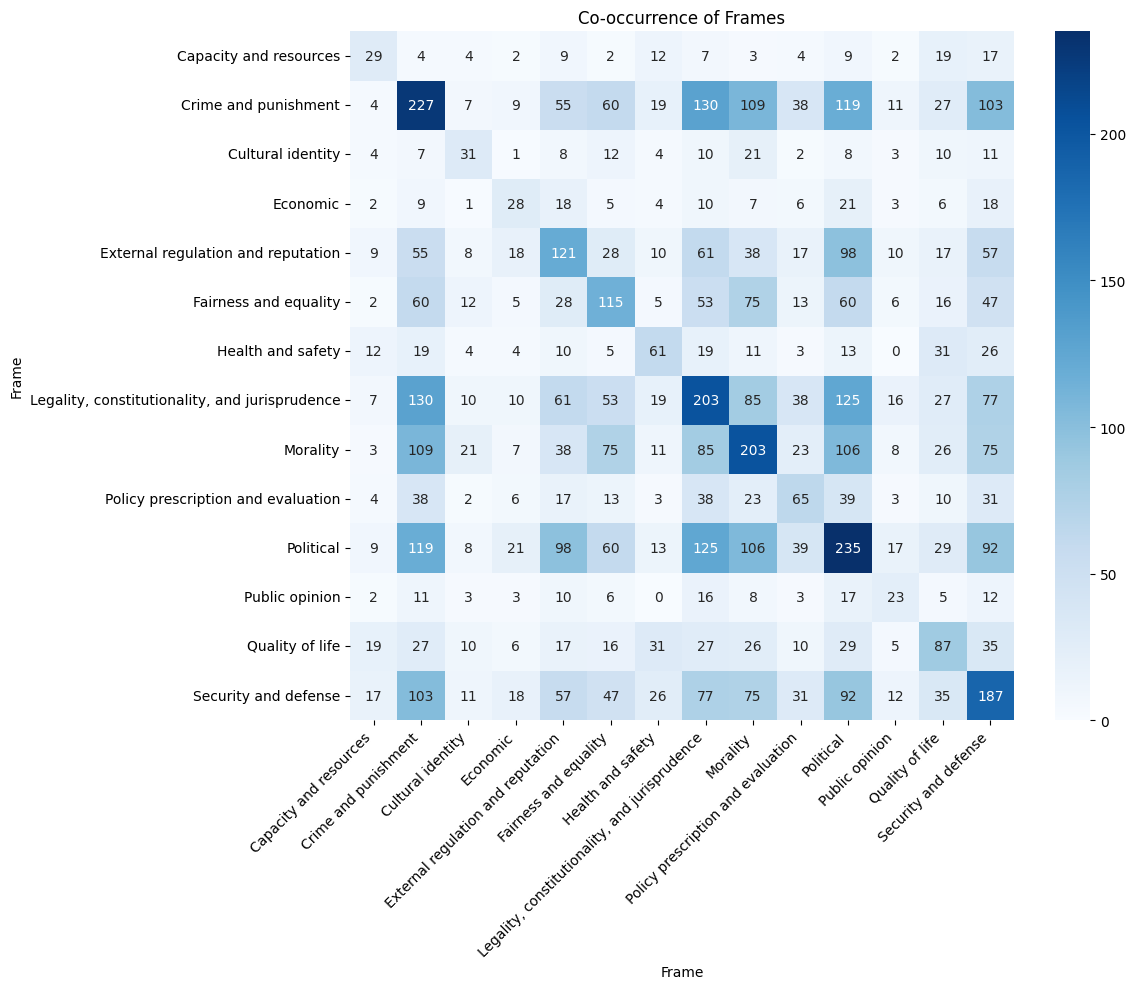

In [10]:
# Creating a co-occurrence matrix
co_occurrence_matrix = frames_df.T.dot(frames_df)

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(co_occurrence_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Co-occurrence of Frames')
plt.ylabel('Frame')
plt.xlabel('Frame')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [11]:
# Creating a co-occurrence matrix
co_occurrence_matrix = frames_df.T.dot(frames_df)

In [12]:
co_occurrence_matrix

,Capacity and resources,Crime and punishment,Cultural identity,Economic,External regulation and reputation,Fairness and equality,Health and safety,"Legality, constitutionality, and jurisprudence",Morality,Policy prescription and evaluation,Political,Public opinion,Quality of life,Security and defense
Capacity and resources,29,4,4,2,9,2,12,7,3,4,9,2,19,17
Crime and punishment,4,227,7,9,55,60,19,130,109,38,119,11,27,103
Cultural identity,4,7,31,1,8,12,4,10,21,2,8,3,10,11
Economic,2,9,1,28,18,5,4,10,7,6,21,3,6,18
External regulation and reputation,9,55,8,18,121,28,10,61,38,17,98,10,17,57
Fairness and equality,2,60,12,5,28,115,5,53,75,13,60,6,16,47
Health and safety,12,19,4,4,10,5,61,19,11,3,13,0,31,26
"Legality, constitutionality, and jurisprudence",7,130,10,10,61,53,19,203,85,38,125,16,27,77
Morality,3,109,21,7,38,75,11,85,203,23,106,8,26,75
Policy prescription and evaluation,4,38,2,6,17,13,3,38,23,65,39,3,10,31


## "frame" on "type" Distribution (Absolute and Relative)

In [13]:
cols = list(frame_map.keys()) + ['type']

# Selecting only the frames columns
frames_df = df[cols]

In [14]:
#rename columns
frames_df.columns = [frame_map[col] for col in frames_df.columns if col in frame_map.keys()] + ['type']

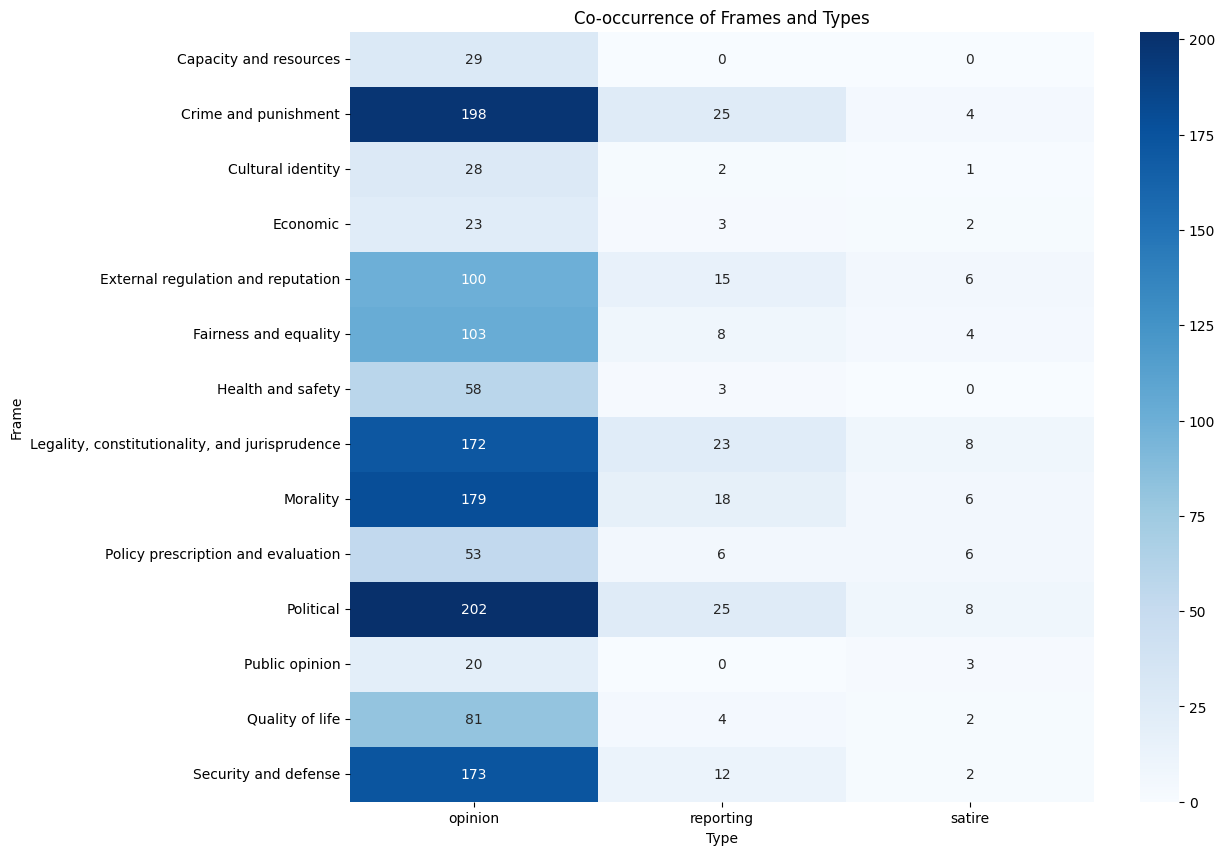

In [15]:
# Creating a co-occurrence matrix between frames and types
type_frame_matrix = frames_df.groupby('type').sum().T

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(type_frame_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Co-occurrence of Frames and Types')
plt.ylabel('Frame')
plt.xlabel('Type')
plt.show()

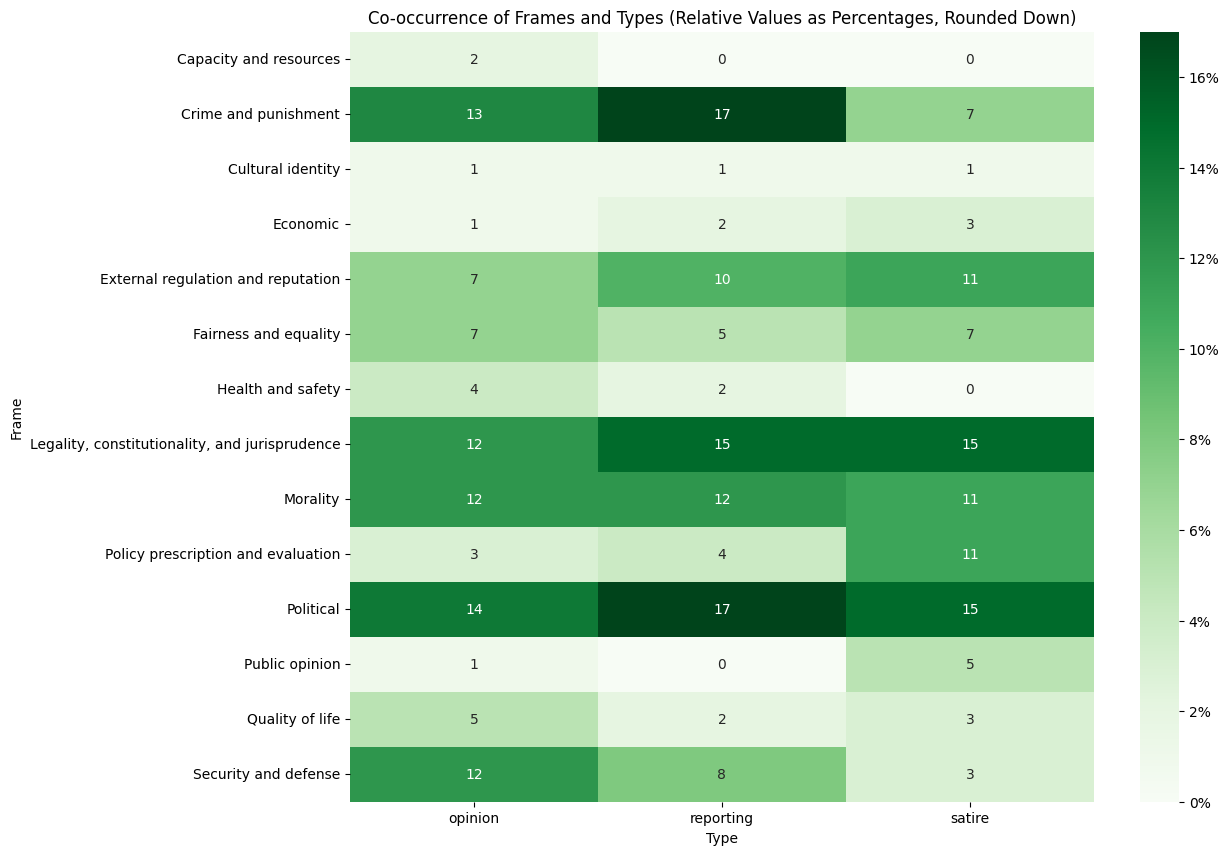

In [16]:
# Creating a co-occurrence matrix between frames and types
type_frame_matrix = frames_df.groupby('type').sum().T

# Normalize the type-frame matrix to relative values by columns (types)
type_frame_relative = type_frame_matrix.div(type_frame_matrix.sum(axis=0), axis=1)

# Plotting the heatmap with relative values as percentages rounded down
plt.figure(figsize=(12, 10))
sns.heatmap(np.floor(type_frame_relative * 100), annot=True, fmt=".0f", cmap="Greens", cbar_kws={'format': '%.0f%%'})
plt.title('Co-occurrence of Frames and Types (Relative Values as Percentages, Rounded Down)')
plt.ylabel('Frame')
plt.xlabel('Type')
plt.show()


## Number of Articles

In [17]:
num_articles = len(df)
articles_table = pd.DataFrame({"Total Articles": [num_articles]})
print(articles_table)


   Total Articles
0             433


## Text Length, Number of Sentences, Words/Chars per Sentence

In [50]:
import pandas as pd
import numpy as np

df = pd.read_json('../../data/semeval/muse-dlf/semeval_train.json')

In [51]:
# Calculate the number of sentences per article
df['num_sentences'] = df.groupby('article_id')['text'].transform('count')

# Calculate the number of words per sentence
df['words_per_sentence'] = df['text'].apply(lambda x: len(x.split()))

# Calculate the metrics for number of sentences per article
sentence_stats = df.groupby('article_id')['num_sentences'].first().describe(percentiles=[.25, .75, .95, .99])

# Calculate the metrics for number of words per sentence
word_stats = df['words_per_sentence'].describe(percentiles=[.25, .75, .95, .99])

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Metric': ['mean', 'std', 'min', 'median', 'max', '25th_percentile', '75th_percentile', '95th_percentile', '99th_percentile'],
    'Number of Sentence': [
        sentence_stats['mean'], sentence_stats['std'], sentence_stats['min'], sentence_stats['50%'], sentence_stats['max'],
        sentence_stats['25%'], sentence_stats['75%'], sentence_stats['95%'], sentence_stats['99%']
    ],
    'Number of Words': [
        word_stats['mean'], word_stats['std'], word_stats['min'], word_stats['50%'], word_stats['max'],
        word_stats['25%'], word_stats['75%'], word_stats['95%'], word_stats['99%']
    ]
})

summary_df

,Metric,Number of Sentence,Number of Words
0,mean,39.011547,23.293097
1,std,35.557366,17.659398
2,min,4.000000,1.000000
3,median,30.000000,19.000000
4,max,408.000000,184.000000
5,25th_percentile,19.000000,11.000000
6,75th_percentile,44.000000,31.000000
7,95th_percentile,108.800000,56.000000
8,99th_percentile,166.760000,90.000000


# SRL Analysis

Analyzing the SRL data.

In [56]:
# read file from data\srls\mfc\mfc_labeled.pkl

df_srl = pd.read_pickle('../../data/srls/semeval/semeval_train.pkl')

In [57]:
# Function to count arguments in each sentence
def count_args(srls):
    count = 0
    for srl in srls:
        if srl['predicate'] and (srl['ARG0'] or srl['ARG1']):
            count += sum([1 for key in ['ARG0', 'ARG1'] if srl[key]])
    return count

# Apply the function to each row
df_srl['arg_count'] = df_srl['srls'].apply(count_args)

# Calculate descriptive statistics for argument count
arg_stats = df_srl['arg_count'].describe(percentiles=[.25, .5, .75, .95, .99]).to_dict()

# Function to count words in predicate, ARG0, and ARG1 individually
def count_words_individually(srls):
    word_counts = []
    for srl in srls:
        word_counts.append({
            'predicate': len(srl['predicate'].split()),
            'ARG0': len(srl.get('ARG0', '').split()),
            'ARG1': len(srl.get('ARG1', '').split())
        })
    return word_counts

# Apply function to count words individually
df_srl['word_counts_individual'] = df_srl['srls'].apply(count_words_individually)

# Flatten the list of word counts without distinguishing between ARG0 and ARG1
all_word_counts = []

for word_count_list in df_srl['word_counts_individual']:
    for word_count in word_count_list:
        all_word_counts.append(word_count['predicate'])
        all_word_counts.append(word_count['ARG0'])
        all_word_counts.append(word_count['ARG1'])

# Convert to a DataFrame for easy calculation of statistics
df_all_word_counts = pd.DataFrame(all_word_counts, columns=['word_count'])

# Compute statistics for the combined word counts
word_stats = df_all_word_counts['word_count'].describe(percentiles=[.25, .5, .75, .95, .99]).to_dict()

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Metric': ['mean', 'std', 'min', 'median', 'max', '25th_percentile', '75th_percentile', '95th_percentile', '99th_percentile'],
    'Argument Count': [
        arg_stats['mean'], arg_stats['std'], arg_stats['min'], arg_stats['50%'], arg_stats['max'],
        arg_stats['25%'], arg_stats['75%'], arg_stats['95%'], arg_stats['99%']
    ],
    'Word Count': [
        word_stats['mean'], word_stats['std'], word_stats['min'], word_stats['50%'], word_stats['max'],
        word_stats['25%'], word_stats['75%'], word_stats['95%'], word_stats['99%']
    ]
})

summary_df

,Metric,Argument Count,Word Count
0,mean,4.956488,3.086896
1,std,4.210656,6.378115
2,min,0.000000,0.000000
3,median,4.000000,1.000000
4,max,42.000000,200.000000
5,25th_percentile,2.000000,1.000000
6,75th_percentile,7.000000,2.000000
7,95th_percentile,13.000000,14.000000
8,99th_percentile,20.000000,32.000000
